In [1]:
import sys
from pathlib import Path
import pandas as pd

sys.path.insert(0, str(Path.cwd().parent))

import numpy as np
from cogwheel import data, gw_utils, gw_plotting, utils
from dot_pe import inference


# Generate synthetic data for inference

In [2]:
# create data
event_data_kwargs = {
    "detector_names": "HLV",
    "duration": 120.0,
    "asd_funcs": ["asd_H_O3", "asd_L_O3", "asd_V_O3"],
    "tgps": 0.0,
    "fmax": 1600.0,
}


event_data = data.EventData.gaussian_noise(
    eventname="example_eventdata", **event_data_kwargs, seed=20250311
)

mchirp = 75
q = 1 / 2

m1, m2 = gw_utils.mchirpeta_to_m1m2(mchirp, gw_utils.q_to_eta(q))
injection_par_dic = dict(
    m1=m1,
    m2=m2,
    ra=0.5,
    dec=0.5,
    iota=np.pi * 1 / 3,
    psi=1.0,
    phi_ref=12.0,
    s1z=0.6,
    s2z=0.6,
    s1x_n=0.1,
    s1y_n=0.2,
    s2x_n=0.3,
    s2y_n=-0.2,
    l1=0.0,
    l2=0.0,
    tgps=0.0,
    f_ref=50.0,
    d_luminosity=5e3,
    t_geocenter=0.0,
)

event_data.inject_signal(injection_par_dic, "IMRPhenomXODE")

print(event_data.injection["d_h"] - event_data.injection["h_h"] / 2)
print(sum(event_data.injection["d_h"] - event_data.injection["h_h"] / 2))

[13.05668831 32.44716761  1.04042227]
46.544278189095614


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
# Alternatively, load data form file
event_data = data.EventData.from_npz(filename="example_eventdata.npz")

FileNotFoundError: [Errno 2] No such file or directory: 'example_eventdata.npz'

Set bank folder, in the relevant mass range.

See how to create mass ranges in create_sample_bank.ipynb


In [6]:
bank_folder = "test_bank"
bank_folder = Path(bank_folder)
event_dir = event_data.eventname

In [7]:
rundir = inference.run(
    event_dir=event_dir,
    event=event_data,
    bank_folder=bank_folder,
    n_int=2**16,
    n_ext=512,
    n_phi=32,
    n_t=64,
    i_int_start=0,
    blocksize=2**10,
    single_detector_blocksize=2**10,
    seed=42,
    size_limit=10**6,
    draw_subset=True,
    n_draws=None,
)

Setting paths & loading configurations...
Creating COGWHEEL objects...
Searching incoherent solution for example_eventdata
Set intrinsic parameters, lnL = 53.38219019331538
Set time, lnL(L) = 37.90466501126294
Set sky location, lnL = 52.57982514168386
Set phase and distance, lnL = 52.57982514168386
Set mchirp_range = (np.float64(17.827463734192232), np.float64(198.8935035423655))


Processing intrinsic batches: 100%|██████████| 64/64 [02:31<00:00,  2.37s/it]


29097 intrinsic samples selected.
Running magic integral...


2025-07-17 20:30:37 - Getting 16 MarginalizationInfo objects.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 37050 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 65181 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 64823 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 40690 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 32288 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 28418 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 2186 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 31513 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 53576 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 21493 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 62484 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 21931 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 57011 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 65436 added.
2025-07-17 20:30:41 - MarginalizationInfo: Sample 62380 a

Creating 29 x 1 likelihood blocks...


2025-07-17 20:30:45 - Starting block creation: block_1_0.npz
2025-07-17 20:30:47 - Starting block creation: block_2_0.npz
2025-07-17 20:30:48 - Starting block creation: block_3_0.npz
2025-07-17 20:30:49 - Starting block creation: block_4_0.npz
2025-07-17 20:30:51 - Starting block creation: block_5_0.npz
2025-07-17 20:30:52 - Starting block creation: block_6_0.npz
2025-07-17 20:30:53 - Starting block creation: block_7_0.npz
2025-07-17 20:30:54 - Starting block creation: block_8_0.npz
2025-07-17 20:30:56 - Starting block creation: block_9_0.npz
2025-07-17 20:30:57 - Starting block creation: block_10_0.npz
2025-07-17 20:30:58 - Starting block creation: block_11_0.npz
2025-07-17 20:30:59 - Starting block creation: block_12_0.npz
2025-07-17 20:31:01 - Starting block creation: block_13_0.npz
2025-07-17 20:31:02 - Starting block creation: block_14_0.npz
2025-07-17 20:31:03 - Starting block creation: block_15_0.npz
2025-07-17 20:31:04 - Starting block creation: block_16_0.npz
2025-07-17 20:31:

Standardizing samples...
Standardizing samples done in 5.99 seconds.
Saving samples to file...
Samples saved to:
 example_eventdata/run_0/samples.feather


In [8]:
rundirs = sorted(
    Path("example_eventdata").glob("run_*"),
    key=lambda x: int(x.name.split("_")[-1]),
)

rundir = rundirs[-1]
summary_results = utils.read_json(rundirs[-1] / "summary_results.json")

for k, v in summary_results.items():
    print(k, v)
    

n_effective 12301.608763214774
n_effective_i 446.1709442690977
n_effective_e 56.839370505210866
bestfit_lnlike_max 54.23012427848412
lnl_marginalized_max 51.82500622517153
n_i_inds_used 29097
ln_evidence 25.011839959058165
ln_evidence_discarded 21.097027899909307
n_distance_marginalizations 14190862
injection {'bestfit_lnlike': 46.86562922368122, 'lnl_marginalized': 43.40632219234138}


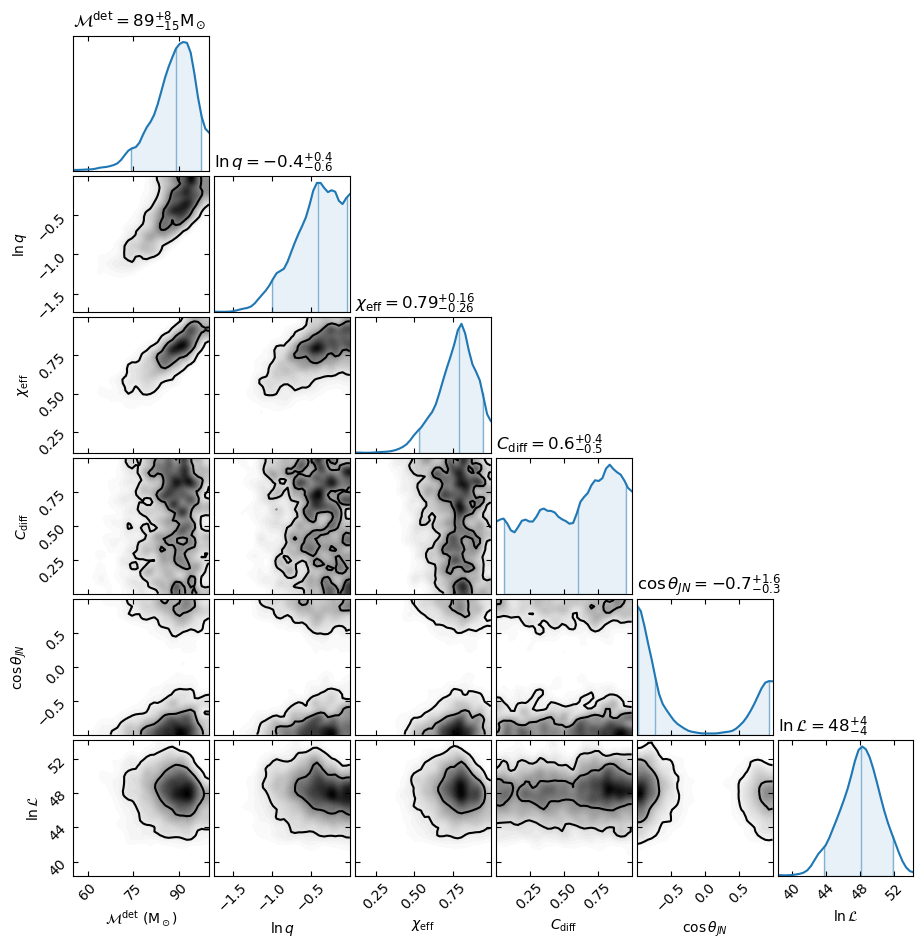

In [9]:
samples = pd.read_feather(rundirs[-1] / "samples.feather")
params = ["mchirp", "lnq", "chieff", "cumchidiff", "costheta_jn", "lnl"]
gw_plotting.CornerPlot(samples, params=params, smooth=1).plot()